In [1]:
%matplotlib inline
import matplotlib
matplotlib.rc("font", size=18, family="serif")
import yt
import numpy as np
import matplotlib.pyplot as plt
from yt.utilities.physical_ratios import cm_per_kpc, K_per_keV
from yt.units import mp
import pyxsim
import soxs
import scipy
import scipy.signal
import aplpy


/mnt/lustre/ast2/astadit/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/mnt/lustre/ast2/astadit/anaconda3/lib/python3.7/site-packages/pyxsim/source_generators/light_cone.py:11: VisibleDeprecationWarning: Development of the CosmologySplice module has been moved to the yt_astro_analysis package. This version is deprecated and will be removed from yt in a future release. See https://github.com/yt-project/yt_astro_analysis for further information.
  from yt.analysis_modules.cosmological_observation.api import LightCone
/mnt/lustre/ast2/astadit/anaconda3/lib/python3.7/site-packages/yt/analysis_modules/cosmological_observation/api.py:28: VisibleDeprecationWarning: Development of the LightCone module has been moved to the yt_astro_analysis package. This version is deprecated and will be removed from yt in a future release. See https://githu

In [2]:
plt.rcParams['font.size']=18
plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.minor.size']=5
plt.rcParams['xtick.major.width']=2
plt.rcParams['xtick.minor.width']=1
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.minor.size']=5
plt.rcParams['ytick.major.width']=2
plt.rcParams['ytick.minor.width']=1
plt.rcParams['ytick.direction']='in'

In [3]:
Msun = 2.e33
ks = 1.e3
area = (2000.0, "cm**2") # collecting area
dist=(1.0, "Mpc")
RA,dec = (349.60, -42.0) 
nH = 1.93e-2  #in units of 10^22 /cm/cm
Bins         = np.arange(0.0, 5., 1.e-3)
bins         = np.arange(0.0, 5., 0.13)
t02  = 0
nx         = 200
ddims      = (nx,nx,nx)

In [4]:
# base     = "/home/aditiv/CGM/Pyxsim/Data/"
base     = "/mnt/lustre/ast2/astadit/CGM/Pyxsim/Data/"

folder = "HR_0821_n6e-5_T1e6_hse_SFR10_Rsf2kpc/"
# folder ="HR_0821_1e-6_SFR3/"

if (folder == "HR_0821_n6e-5_T1e6_hse_SFR10_Rsf2kpc/"):
    filename = "DD0130/"
    outfile  = folder
    mass     = 69.1231289903726 * Msun * 1.e8
    factor   = 2.3
    
elif (folder == "HR_0821_1e-6_SFR3/"):
    filename = "DD0300/"
    outfile  = folder
    mass     = 37.67087766588439 * Msun * 1.e8
    factor   = 1./1.5
t = 30 * ks   
exp_time = (t, "s")
(tlow, thigh) = (1.e5, 2.e7)
(dlow, dhigh) = (1.e-29, 1.e-25)
extrema     = dict(temperature=(tlow, thigh), density=(dlow, dhigh))

In [5]:
base1 = "/home/aditiv/CGM/Pyxsim/Spectra/"
base1 = "/mnt/lustre/ast2/astadit/CGM/Pyxsim/Spectra/"
file  = base1 + folder + filename


Sim_evnty   = np.loadtxt(file + "sim_spec_HR.txt", usecols = 1)
Sim_evntx   = np.loadtxt(file + "sim_spec_HR.txt", usecols = 0)

sim_evnty   = np.loadtxt(file + "sim_spec_LR.txt", usecols = 1)
sim_evntx   = np.loadtxt(file + "sim_spec_LR.txt", usecols = 0)


templn      = np.loadtxt(file + "temp_cellm.txt", usecols = 0)
masst       = np.loadtxt(file + "temp_cellm.txt", usecols = 1)

densln      = np.loadtxt(file + "dens_cellm.txt", usecols = 0)
massd       = np.loadtxt(file + "dens_cellm.txt", usecols = 1)

/mnt/lustre/ast2/astadit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
yt : [INFO     ] 2020-04-12 14:57:09,742 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-04-12 14:57:09,743 Parameters: domain_dimensions         = [200 200 200]
yt : [INFO     ] 2020-04-12 14:57:09,744 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2020-04-12 14:57:09,745 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2020-04-12 14:57:09,746 Parameters: cosmological_simulation   = 0.0
soxs : [INFO     ] 2020-04-12 14:57:10,158 Using APEC version 3.0.9.
soxs : [INFO     ] 2020-04-12 14:57:10,161 Using apec_v3.0.9_line.fits for generating spectral lines.
soxs : [INFO     ] 2020-04-12 14:57:10,161 Using apec_v3.0.9_coco.fits for generating the continuum.
pyxsim : [INFO     ] 2020-04-12 14:57:10,364 Observing local source at distance 999.9999999999999 kpc.
pyxsim : [INFO     ] 

Log Normal box analysed!


/mnt/lustre/ast2/astadit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:143: RuntimeWarning: invalid value encountered in true_divide
yt : [INFO     ] 2020-04-12 14:57:56,127 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-04-12 14:57:56,128 Parameters: domain_dimensions         = [200 200 200]
yt : [INFO     ] 2020-04-12 14:57:56,128 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2020-04-12 14:57:56,129 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2020-04-12 14:57:56,130 Parameters: cosmological_simulation   = 0.0
soxs : [INFO     ] 2020-04-12 14:57:56,680 Using APEC version 3.0.9.
soxs : [INFO     ] 2020-04-12 14:57:56,682 Using apec_v3.0.9_line.fits for generating spectral lines.
soxs : [INFO     ] 2020-04-12 14:57:56,682 Using apec_v3.0.9_coco.fits for generating the continuum.
pyxsim : [INFO     ] 2020-04-12 14:57:56,884 Observing local source at distance 999.9999999999999 kpc.
pyxsim : [INFO     ]

Log Normal box analysed!


yt : [INFO     ] 2020-04-12 14:58:41,214 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-04-12 14:58:41,215 Parameters: domain_dimensions         = [200 200 200]
yt : [INFO     ] 2020-04-12 14:58:41,216 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2020-04-12 14:58:41,217 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2020-04-12 14:58:41,218 Parameters: cosmological_simulation   = 0.0
soxs : [INFO     ] 2020-04-12 14:58:41,633 Using APEC version 3.0.9.
soxs : [INFO     ] 2020-04-12 14:58:41,635 Using apec_v3.0.9_line.fits for generating spectral lines.
soxs : [INFO     ] 2020-04-12 14:58:41,636 Using apec_v3.0.9_coco.fits for generating the continuum.
pyxsim : [INFO     ] 2020-04-12 14:58:41,887 Observing local source at distance 999.9999999999999 kpc.
pyxsim : [INFO     ] 2020-04-12 14:58:41,889 Using emission measure field '(gas, emission_measure)'.
pyxsim : [INFO     ] 2020-04-12 14:58:41,890 Using temperature fie

Log Normal box analysed!


yt : [INFO     ] 2020-04-12 14:59:25,224 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-04-12 14:59:25,225 Parameters: domain_dimensions         = [200 200 200]
yt : [INFO     ] 2020-04-12 14:59:25,226 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2020-04-12 14:59:25,227 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2020-04-12 14:59:25,228 Parameters: cosmological_simulation   = 0.0
soxs : [INFO     ] 2020-04-12 14:59:25,644 Using APEC version 3.0.9.
soxs : [INFO     ] 2020-04-12 14:59:25,646 Using apec_v3.0.9_line.fits for generating spectral lines.
soxs : [INFO     ] 2020-04-12 14:59:25,647 Using apec_v3.0.9_coco.fits for generating the continuum.
pyxsim : [INFO     ] 2020-04-12 14:59:25,857 Observing local source at distance 999.9999999999999 kpc.
pyxsim : [INFO     ] 2020-04-12 14:59:25,858 Using emission measure field '(gas, emission_measure)'.
pyxsim : [INFO     ] 2020-04-12 14:59:25,859 Using temperature fie

Log Normal box analysed!


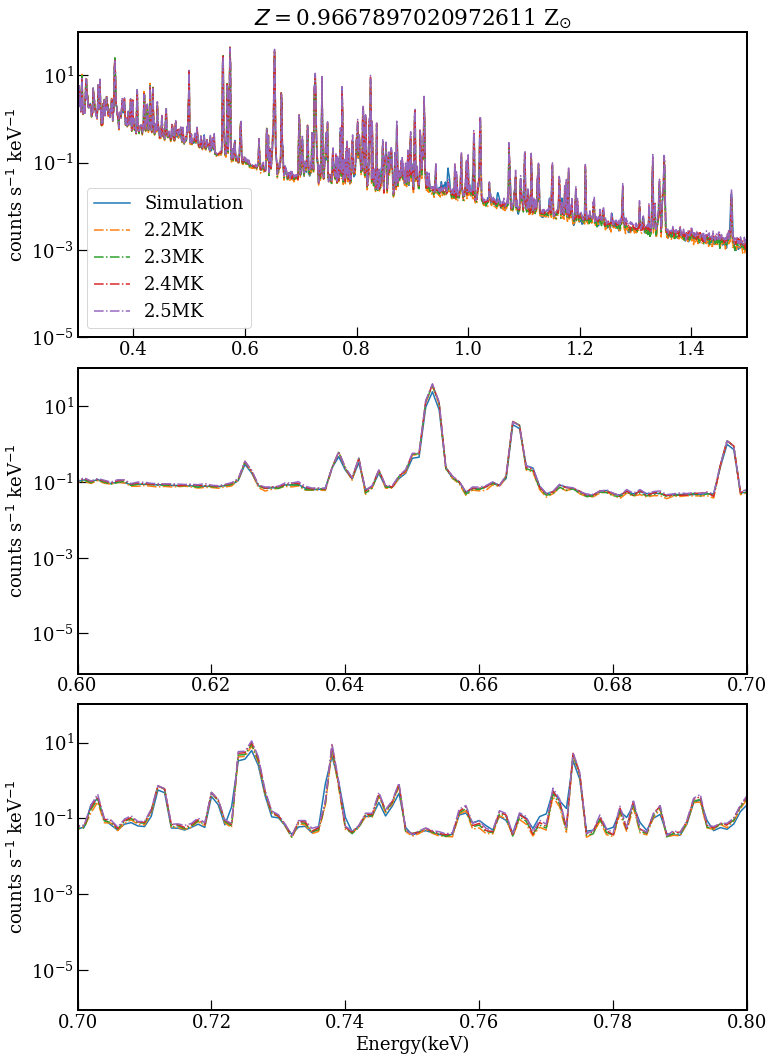

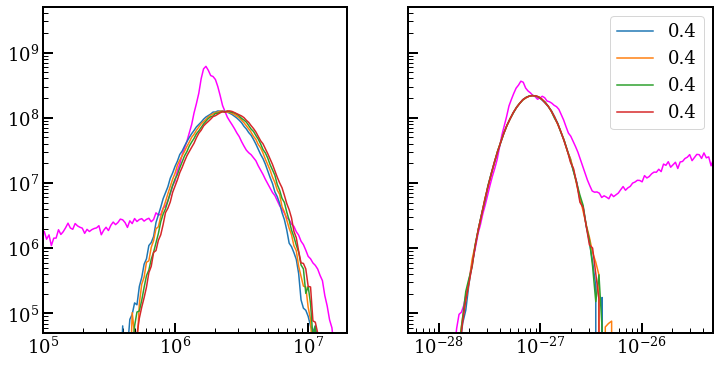

In [12]:
#Generates a Log Normal Box
met   = np.loadtxt(file + "met_temp.txt",usecols=1)
Zmetub01 = np.average(met)
f, ax = plt.subplots(3, 1, gridspec_kw = {'wspace':0.4, 'hspace':0.1,},\
                        figsize=(12, 18))

f2, ax2 = plt.subplots(1, 2, figsize=(12, 6))


for i in range(3):
    ax[i].tick_params(direction='in', which='both')
    ax[i].tick_params(labelsize=18)
    ax[i].tick_params(size=10.0)
    ax[i].tick_params(size=5.0,which='minor')
    ax[i].tick_params(width=1.2)
    ax[i].tick_params(width=0.5,which='minor')
    ax[i].set_yscale('log')
    ax[i].set_ylabel(r'counts s$^{-1}$ keV$^{-1}$') 
    ax[i].plot(Sim_evntx, Sim_evnty/Sim_evntx, '-',label='Simulation')

ax[0].set_xlim(.3, 1.5)
ax[0].set_ylim(1.e-5, 1.e2)
ax[0].set_title(r"$Z=$" + str(Zmetub01)+" Z$_{\odot}$")
# ax[0].text(0.75, 5.e-6,r"$T=$" + str(t0/1.e6)+"$X10^6$ K")
ax[1].set_xlim(.6,0.7)
ax[2].set_xlim(.7,0.8)
ax[2].set_xlabel('Energy(keV)')
ax[0].legend()

plt.setp(ax2, 'yscale', 'log')
plt.setp(ax2, 'xscale', 'log')
ax2[0].set_xlim(1.e5,2.e7)
ax2[1].set_xlim(5.e-29,5.e-26)
plt.setp(ax2, 'ylim', (1.e38/Msun,1.e43/Msun))
plt.setp(ax2[1],'yticklabels', '')
ax2[0].plot(templn, masst/Msun, color= 'magenta')
ax2[1].plot(densln, massd/Msun, color= 'magenta')



R      = 100. # radius of cluster in kpc
R0     = 44.22 
v0     = 1.e8/3.0**0.5  #in cm^2

tpeak  = 2.0e6
rhopeak= 7.17177799e-28
sigmat = 0.4 
sigmad = 0.4 
dt     = 0.1e6
# dsig   = 0.2
i      = 0

if (folder == "HR_0821_n6e-5_T1e6_hse_SFR10_Rsf2kpc/"):
    reff = 40.0
#     sigmat = 0.42
    tpeak  = 2.2e6
    
elif (folder == "HR_0821_1e-6_SFR3/"):
    reff = 30.0
    sigmat = 0.44
    tpeak  = 0.8e6

x, y, z = np.mgrid[-R:R:nx*1j,
                   -R:R:nx*1j,
                   -R:R:nx*1j]


r     = np.sqrt(x**2+y**2+z**2)
r0    = np.full(ddims, 6.25)

velx  = np.zeros(ddims)
vely  = np.zeros(ddims)
velz  = np.zeros(ddims)
data = {}
data["velocity_x"]  = (velx, "cm/s")
data["velocity_y"]  = (velx, "cm/s")
data["velocity_z"]  = (velz, "cm/s")

color = ['red', 'blue', 'black', 'green', 'orange']

#Comment the following line to get static gas in Box
# velx[r<=R0] = v0 * (r0[r<=R0]/r[r<R0])**(2./3.)  * (x[r<=R0]/r[r<=R0])
# vely[r<=R0] = v0 * (r0[r<=R0]/r[r<R0])**(2./3.)  * (y[r<=R0]/r[r<=R0])
# velz[r<=R0] = v0 * (r0[r<=R0]/r[r<R0])**(2./3.)  * (z[r<=R0]/r[r<=R0])


# while (sigmat<=0.45):
while (tpeak<=2.5e6):
    gauss_temp = np.random.lognormal(mean=np.log(tpeak), sigma=sigmat, size=ddims)
    gauss_dens = np.random.lognormal(mean=np.log(rhopeak), sigma=sigmad, size=ddims)
    T     = gauss_temp
    dens  = gauss_dens


    data["density"] = (dens, "g/cm**3")
    data["temperature"] = (T, "K")

    bbox = np.array([[-0.5, 0.5], [-0.5, 0.5], [-0.5, 0.5]]) # The bounding box of the domain in code units 

    lnorm_box1  = yt.load_uniform_grid(data, ddims, 2*R*cm_per_kpc, bbox=bbox)
    lncr        = lnorm_box1.sphere("c", (reff,"kpc"))
    source_model = pyxsim.ThermalSourceModel("apec", 0.1, 5.0, 5000, Zmet=Zmetub01)
    
    profile = yt.create_profile(lncr,   ["temperature"],fields=["cell_mass"],\
                                    n_bins= [128, 128], weight_field=None, \
                                    accumulation=False, extrema=extrema)
    
    x = profile.x
    y = profile["cell_mass"]

    
    ax2[0].plot(x, y/Msun, label=str(tpeak/1.e6)+'MK' )   
    
    profile = yt.create_profile(lncr,   ["density"],fields=["cell_mass"],\
                                    n_bins= [128, 128], weight_field=None, \
                                    accumulation=False, extrema=extrema)
    
    x = profile.x
    y = profile["cell_mass"]
    
    
#     ax2[0].legend()
    ax2[1].plot(x, y/Msun, label=str(sigmat) )
    ax2[1].legend()
#     print(color[i])


    ##########-------Generate HR spectra w Cut Region--------#####################
    Photons1     = pyxsim.PhotonList.from_data_source(lncr,0.0, area, exp_time, source_model,dist=dist)
    # Photons2     = pyxsim.PhotonList.from_data_source(lncr,0.0, area, exp_time, source_model,dist=dist)
    Photons      = Photons1 #+ Photons2
    Events       = Photons.project_photons("z", (RA, dec), absorb_model="wabs", nH=nH)
    # Events1      = Photons.project_photons("z", (RA, dec))
    energy = Events["eobs"]
    Ega = np.asarray(energy)
    Ln_evnty , Ln_evntx  = np.histogram(Ega, bins=Bins) 
    ln_evnty , ln_evntx  = np.histogram(Ega, bins=bins) 
    print("Log Normal box analysed!")

    for i in range(3):
#             ax[i].plot(Ln_evntx[:-1], Ln_evnty/Ln_evntx[:-1]/(t),'-.', label=str(sigmad)) 
            #str(tpeak/1.e6) + 'MK') 
        ax[i].plot(Ln_evntx[:-1], Ln_evnty/Ln_evntx[:-1]/(t),'-.', label=str(tpeak/1.e6) + 'MK')
    ax[0].legend()

    tpeak  = tpeak + dt
#     sigmat = sigmat + 0.01
    i = i + 1
#     print(sigmad)
#     sigmad = sigmad + dsig
    
# plt.savefig(folder + "sigma-02-06-temp2MK-ldlsfr.pdf")
# plt.savefig(folder + "sig-04-temp-ldlsfr.pdf")